# Boosting - AdaBoost

## Imports

In [0]:
import pandas as pd
import numpy as np
import sys
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from IPython.display import clear_output

## Progressbar method

In [0]:
def update_progress(progress, length):
    bar_length = 20
    
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1
    
    block = int(round(bar_length * progress))

    clear_output(wait = True)
    text = "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100)
    print(text)
    
np.set_printoptions(threshold=sys.maxsize)

## Connect to gDrive

In [11]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Wine red quality

### Read the dataset with split 70:30

In [12]:
X_train = np.loadtxt('/content/gdrive/My Drive/ensemble/data/red-0_3/x-train.csv', delimiter=',')
y_train = np.loadtxt('/content/gdrive/My Drive/ensemble/data/red-0_3/y-train.csv', delimiter=',')
X_test = pd.read_csv('/content/gdrive/My Drive/ensemble/data/red-0_3/x_test.csv', sep=',').values
y_test = np.loadtxt('/content/gdrive/My Drive/ensemble/data/red-0_3/y-test.csv', delimiter=',')

print(f'shape of sets: X_train {X_train.shape} | y_train {y_train.shape} | X_test {X_test.shape} | y_test {y_test.shape}')

shape of sets: X_train (1119, 11) | y_train (1119,) | X_test (480, 11) | y_test (480,)


### Case AdaBoost with SVM as one-vs-one multiclass strategy

#### Chart of accuracy based on various number of estimators in ensemble model with bootstrap, SAMME algorithm

In [0]:
train_acc_list = []
test_acc_list = []
max_estimators = 300
min_estimators = 250

update_progress(min_estimators / max_estimators, max_estimators)

for i in range(min_estimators, max_estimators):
    ada_clf = AdaBoostClassifier(SVC(), n_estimators=i, algorithm='SAMME')
    ada_clf.fit(X_train, y_train)

    y_train_pred = ada_clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    
    y_pred = ada_clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred)
    
    test_acc_list.append(test_acc)
    train_acc_list.append(train_acc)
    
    update_progress(i / max_estimators, max_estimators)
    
update_progress(max_estimators, max_estimators)
print('done!')

Progress: [####################] 100.0%
done!


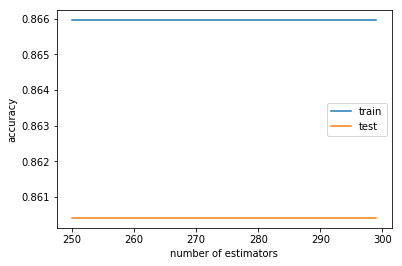

In [0]:
plt.plot(range(min_estimators, max_estimators), train_acc_list, label='train')
plt.plot(range(min_estimators, max_estimators), test_acc_list, label='test')
plt.xlabel('number of estimators')
plt.ylabel('accuracy')

plt.legend()
# plt.title('Dokładność modelu w zależności od liczby estymatorów przy podziale danych 70:30')
plt.savefig('/content/gdrive/My Drive/ensemble/charts/wine-red_03_estimators_ada_svc.png')
plt.show()

#### Details of the used model

In [0]:
ada_clf

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                      coef0=0.0, decision_function_shape='ovr',
                                      degree=3, gamma='auto_deprecated',
                                      kernel='rbf', max_iter=-1,
                                      probability=False, random_state=None,
                                      shrinking=True, tol=0.001,
                                      verbose=False),
                   learning_rate=1.0, n_estimators=299, random_state=None)

### Case AdaBoost with Linear regression as OVR

In [28]:
train_acc_list = []
test_acc_list = []
max_estimators = 300
min_estimators = 250

update_progress(min_estimators / max_estimators, max_estimators)

for i in range(min_estimators, max_estimators):
    ada_clf = AdaBoostClassifier(LogisticRegression(multi_class='ovr'), n_estimators=i, algorithm='SAMME')
    ada_clf.fit(X_train, y_train)

    y_train_pred = ada_clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    
    y_pred = ada_clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred)
    
    test_acc_list.append(test_acc)
    train_acc_list.append(train_acc)
    
    update_progress(i / max_estimators, max_estimators)
    
update_progress(max_estimators, max_estimators)
print('done!')

Progress: [####################] 100.0%
done!


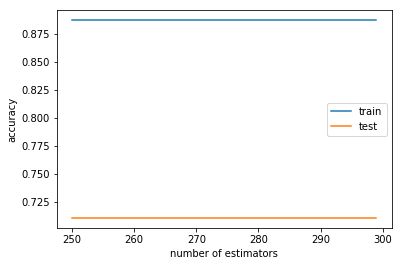

In [30]:
plt.plot(range(min_estimators, max_estimators), train_acc_list, label='train')
plt.plot(range(min_estimators, max_estimators), test_acc_list, label='test')
plt.xlabel('number of estimators')
plt.ylabel('accuracy')

plt.legend()
# plt.title('Dokładność modelu w zależności od liczby estymatorów przy podziale danych 70:30')
plt.savefig('/content/gdrive/My Drive/ensemble/charts/wine-red_03_estimators_ada_lr.png')
plt.show()

### Details of the model

In [32]:
ada_clf

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='ovr',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=None,
                                                     solver='warn', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=1.0, n_estimators=299, random_state=None)

### Read the dataset with split 80:20

In [31]:
X_train = np.loadtxt('/content/gdrive/My Drive/ensemble/data/red-0_2/x-train.csv', delimiter=',')
y_train = np.loadtxt('/content/gdrive/My Drive/ensemble/data/red-0_2/y-train.csv', delimiter=',')
X_test = pd.read_csv('/content/gdrive/My Drive/ensemble/data/red-0_2/x_test.csv', sep=',').values
y_test = np.loadtxt('/content/gdrive/My Drive/ensemble/data/red-0_2/y-test.csv', delimiter=',')

print(f'shape of sets: X_train {X_train.shape} | y_train {y_train.shape} | X_test {X_test.shape} | y_test {y_test.shape}')

shape of sets: X_train (1119, 11) | y_train (1119,) | X_test (480, 11) | y_test (480,)


### Case AdaBoost with SVM as one-vs-one multiclass strategy

#### Chart of accuracy based on various number of estimators in ensemble model with bootstrap, SAMME algorithm

In [33]:
train_acc_list = []
test_acc_list = []
max_estimators = 300
min_estimators = 250

update_progress(min_estimators / max_estimators, max_estimators)

for i in range(min_estimators, max_estimators):
    ada_clf = AdaBoostClassifier(SVC(), n_estimators=i, algorithm='SAMME')
    ada_clf.fit(X_train, y_train)

    y_train_pred = ada_clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    
    y_pred = ada_clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred)
    
    test_acc_list.append(test_acc)
    train_acc_list.append(train_acc)
    
    update_progress(i / max_estimators, max_estimators)
    
update_progress(max_estimators, max_estimators)
print('done!')

Progress: [####################] 100.0%
done!


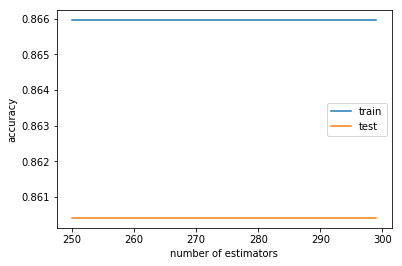

In [34]:
plt.plot(range(min_estimators, max_estimators), train_acc_list, label='train')
plt.plot(range(min_estimators, max_estimators), test_acc_list, label='test')
plt.xlabel('number of estimators')
plt.ylabel('accuracy')

plt.legend()
plt.savefig('/content/gdrive/My Drive/ensemble/charts/wine-red_02_estimators_ada_svc.png')
plt.show()

### Case AdaBoost with Linear regression as OVR



In [35]:
train_acc_list = []
test_acc_list = []
max_estimators = 300
min_estimators = 250

update_progress(min_estimators / max_estimators, max_estimators)

for i in range(min_estimators, max_estimators):
    ada_clf = AdaBoostClassifier(LogisticRegression(multi_class='ovr'), n_estimators=i, algorithm='SAMME')
    ada_clf.fit(X_train, y_train)

    y_train_pred = ada_clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    
    y_pred = ada_clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred)
    
    test_acc_list.append(test_acc)
    train_acc_list.append(train_acc)
    
    update_progress(i / max_estimators, max_estimators)
    
update_progress(max_estimators, max_estimators)
print('done!')

Progress: [####################] 100.0%
done!


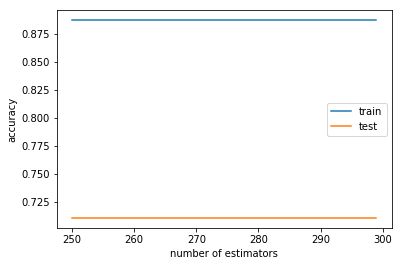

In [36]:
plt.plot(range(min_estimators, max_estimators), train_acc_list, label='train')
plt.plot(range(min_estimators, max_estimators), test_acc_list, label='test')
plt.xlabel('number of estimators')
plt.ylabel('accuracy')

plt.legend()
plt.savefig('/content/gdrive/My Drive/ensemble/charts/wine-red_02_estimators_ada_lr.png')
plt.show()

### Read the dataset with split 60:40

In [37]:
X_train = np.loadtxt('/content/gdrive/My Drive/ensemble/data/red-0_4/x-train.csv', delimiter=',')
y_train = np.loadtxt('/content/gdrive/My Drive/ensemble/data/red-0_4/y-train.csv', delimiter=',')
X_test = pd.read_csv('/content/gdrive/My Drive/ensemble/data/red-0_4/x_test.csv', sep=',').values
y_test = np.loadtxt('/content/gdrive/My Drive/ensemble/data/red-0_4/y-test.csv', delimiter=',')

print(f'shape of sets: X_train {X_train.shape} | y_train {y_train.shape} | X_test {X_test.shape} | y_test {y_test.shape}')

shape of sets: X_train (959, 11) | y_train (959,) | X_test (640, 11) | y_test (640,)


### Case AdaBoost with SVM as one-vs-one multiclass strategy

#### Chart of accuracy based on various number of estimators in ensemble model with bootstrap, SAMME algorithm

In [38]:
train_acc_list = []
test_acc_list = []
max_estimators = 300
min_estimators = 250

update_progress(min_estimators / max_estimators, max_estimators)

for i in range(min_estimators, max_estimators):
    ada_clf = AdaBoostClassifier(SVC(), n_estimators=i, algorithm='SAMME')
    ada_clf.fit(X_train, y_train)

    y_train_pred = ada_clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    
    y_pred = ada_clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred)
    
    test_acc_list.append(test_acc)
    train_acc_list.append(train_acc)
    
    update_progress(i / max_estimators, max_estimators)
    
update_progress(max_estimators, max_estimators)
print('done!')

Progress: [####################] 100.0%
done!


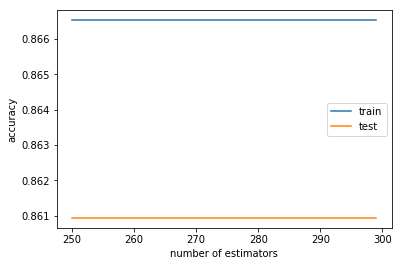

In [39]:
plt.plot(range(min_estimators, max_estimators), train_acc_list, label='train')
plt.plot(range(min_estimators, max_estimators), test_acc_list, label='test')
plt.xlabel('number of estimators')
plt.ylabel('accuracy')

plt.legend()
plt.savefig('/content/gdrive/My Drive/ensemble/charts/wine-red_04_estimators_ada_svc.png')
plt.show()

### Case AdaBoost with Linear regression as OVR

In [40]:
train_acc_list = []
test_acc_list = []
max_estimators = 300
min_estimators = 250

update_progress(min_estimators / max_estimators, max_estimators)

for i in range(min_estimators, max_estimators):
    ada_clf = AdaBoostClassifier(LogisticRegression(multi_class='ovr'), n_estimators=i, algorithm='SAMME')
    ada_clf.fit(X_train, y_train)

    y_train_pred = ada_clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    
    y_pred = ada_clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred)
    
    test_acc_list.append(test_acc)
    train_acc_list.append(train_acc)
    
    update_progress(i / max_estimators, max_estimators)
    
update_progress(max_estimators, max_estimators)
print('done!')

Progress: [####################] 100.0%
done!


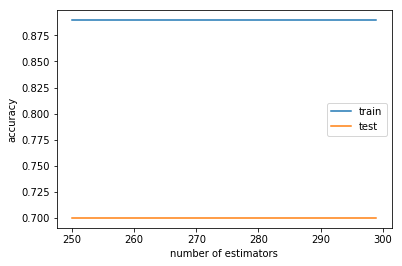

In [41]:
plt.plot(range(min_estimators, max_estimators), train_acc_list, label='train')
plt.plot(range(min_estimators, max_estimators), test_acc_list, label='test')
plt.xlabel('number of estimators')
plt.ylabel('accuracy')

plt.legend()
# plt.title('Dokładność modelu w zależności od liczby estymatorów przy podziale danych 70:30')
plt.savefig('/content/gdrive/My Drive/ensemble/charts/wine-red_04_estimators_ada_lr.png')
plt.show()